<a href="https://colab.research.google.com/github/marceloccs/aprendizagem-nao-sup-deteccao-anomalias-reducao-dimencionalidade/blob/main/Trilha_4_Redu%C3%A7%C3%A3o_de_dimensionalidade_Linear_e_n%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trilha 4: Redução de dimensionalidade Linear e não linear

Essa é uma tarefa que tem como objetivo: praticar, didaticamente, a aplicação das técnicas de redução de dimensionalidade lineares e não lineares. 

1. Selecione duas técnicas de redução dentre as que foram estudadas nas trilhas 3 e 4 (uma linear e uma não linear). 
2. A base já está disponibilizada junto com a documentação desta trilha ([Consulte](https://eadlatosensu.mackenzie.br/mod/resource/view.php?id=578476)). 
3. Aplique as técnicas, utilizando a biblioteca scikit learn, e analise qual delas teve o melhor desempenho nesta base. 
4. Apresente os resultados e descreva o desempenho das técnicas 


In [ ]:
!pip install pandas
!pip install numpy
!pip install tabulate
!pip install -U scikit-learn
!pip install odfpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tabulate import tabulate
from sklearn.decomposition import PCA, KernelPCA

Instalando e importando Libs de uso durante o processamento.

## 1. Selecione duas técnicas de redução dentre as que foram estudadas nas trilhas 3 e 4 (uma linear e uma não linear).

> Escolhidos:
 * Linear: *PCA*
 * Não Linear: *KPCA*



## 2. A base já está disponibilizada junto com a documentação desta trilha ([Consulte](https://eadlatosensu.mackenzie.br/mod/resource/view.php?id=578476)). 

In [ ]:
df = pd.read_excel("https://github.com/marceloccs/pos-ai-files/blob/main/APR%20NA%CC%83O%20SUP_Tarefa_Trilha%204.ods?raw=true",engine="odf")
df = df.drop(df[df['COD_CAT_ASSOC'] == "350101 a 350105"].index, axis=0)
df = df.reset_index()
df_only_numbers = df.drop(columns=["TIPO","CAT_ASSOC","DATA","NOME","GRANDE_REG","SIGLA_UF","NOME_MUN","LEG"])

In [ ]:
def random_colors ():
  r = lambda: random.randint(0,255)
  return '#'+''.join('%02x'%i for i in [r(),r(),r()])

In [ ]:
dfGrandeReg = df.copy()
dfGrandeReg = dfGrandeReg.groupby(by=dfGrandeReg['GRANDE_REG'],as_index=False).first()['GRANDE_REG']
dfGrandeReg = dfGrandeReg.to_frame()

array_color = []

for index, row in dfGrandeReg.iterrows():
    array_color.append(random_colors())

dfGrandeReg = dfGrandeReg.assign(colors=pd.Series(array_color).values)

print(dfGrandeReg)

     GRANDE_REG   colors
0  Centro-Oeste  #87c899
1      Nordeste  #bd9722
2         Norte  #71ec6f
3       Sudeste  #2f1cdc
4           Sul  #65889b


### PCA
*Principal Component Analysis*

In [ ]:
df_only_numbers.copy()
pca = PCA(n_components=2)
df_pca_principal = pd.DataFrame(data = pca.fit_transform(df_only_numbers.copy()), columns=['component1','component2'])
df_pca_principal = pd.concat([df_pca_principal, df[['GRANDE_REG']]], axis = 1)
print(df_pca_principal)

        component1   component2    GRANDE_REG
0    -1.849980e+06 -1142.241987  Centro-Oeste
1    -1.749484e+06 -1237.380847  Centro-Oeste
2    -1.749558e+06 -1229.932128  Centro-Oeste
3    -1.749641e+06 -1221.687791  Centro-Oeste
4    -1.749691e+06 -1216.725379  Centro-Oeste
...            ...          ...           ...
1414 -7.467885e+05  -970.958006           Sul
1415 -7.502692e+05  -623.084167           Sul
1416 -7.518613e+05  -463.970736           Sul
1417 -7.575340e+05   102.996454           Sul
1418 -7.625082e+05   600.148150           Sul

[1419 rows x 3 columns]


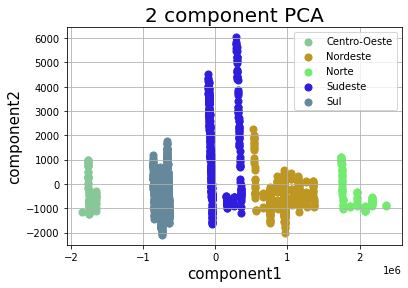

In [ ]:
fig = plt.figure()
pca = fig.add_subplot() 
pca.set_xlabel('component1', fontsize = 15)
pca.set_ylabel('component2', fontsize = 15)
pca.set_title('2 component PCA', fontsize = 20)
for index, row in dfGrandeReg.iterrows():
    indicesToKeep = df_pca_principal.index[df_pca_principal['GRANDE_REG'] == row['GRANDE_REG']]
    pca.scatter(df_pca_principal.loc[indicesToKeep, 'component1']
               , df_pca_principal.loc[indicesToKeep, 'component2']
               , c = row['colors']
               , s = 50)
pca.legend(dfGrandeReg['GRANDE_REG'])
pca.grid()

### KPCA
*(Kernel Principal Component Analysis)*

In [ ]:
kpca_cosine = KernelPCA(n_components=2, kernel="cosine")
df_kpca_cosine_principal = pd.DataFrame(data = kpca_cosine.fit_transform(df_only_numbers.copy()), columns=['component1','component2'])
df_kpca_cosine_principal = pd.concat([df_kpca_cosine_principal, df[['GRANDE_REG']]], axis = 1)
print(df_kpca_cosine_principal)

      component1  component2    GRANDE_REG
0      -0.000302   -0.000200  Centro-Oeste
1      -0.000322   -0.000200  Centro-Oeste
2      -0.000320   -0.000200  Centro-Oeste
3      -0.000319   -0.000200  Centro-Oeste
4      -0.000318   -0.000199  Centro-Oeste
...          ...         ...           ...
1414   -0.000277    0.000135           Sul
1415   -0.000195    0.000135           Sul
1416   -0.000157    0.000135           Sul
1417   -0.000023    0.000136           Sul
1418    0.000094    0.000136           Sul

[1419 rows x 3 columns]


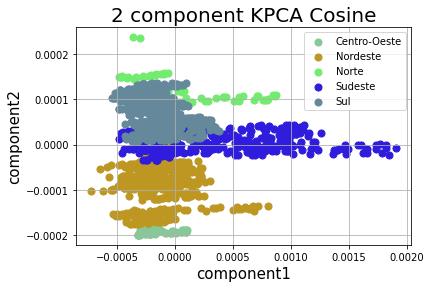

In [ ]:
fig2 = plt.figure()
axkpca_cosine = fig2.add_subplot() 
axkpca_cosine.set_xlabel('component1', fontsize = 15)
axkpca_cosine.set_ylabel('component2', fontsize = 15)
axkpca_cosine.set_title('2 component KPCA Cosine', fontsize = 20)
for index, row in dfGrandeReg.iterrows():
    indicesToKeep = df_kpca_cosine_principal.index[df_kpca_cosine_principal['GRANDE_REG'] == row['GRANDE_REG']]
    axkpca_cosine.scatter(df_kpca_cosine_principal.loc[indicesToKeep, 'component1']
               , df_kpca_cosine_principal.loc[indicesToKeep, 'component2']
               , c = row['colors']
               , s = 50)
axkpca_cosine.legend(dfGrandeReg['GRANDE_REG'])
axkpca_cosine.grid()

In [ ]:
kpca_rbf = KernelPCA(n_components=2, kernel="rbf")
df_kpca_rbf_principal = pd.DataFrame(data = kpca_rbf.fit_transform(df_only_numbers.copy()), columns=['component1','component2'])
df_kpca_rbf_principal = pd.concat([df_kpca_rbf_principal, df[['GRANDE_REG']]], axis = 1)
print(df_kpca_rbf_principal)

      component1  component2    GRANDE_REG
0      -0.000997   -0.009691  Centro-Oeste
1      -0.000997   -0.002828  Centro-Oeste
2      -0.000997   -0.019621  Centro-Oeste
3      -0.000997    0.006439  Centro-Oeste
4      -0.000997   -0.000445  Centro-Oeste
...          ...         ...           ...
1414   -0.000997    0.002323           Sul
1415   -0.000997   -0.000581           Sul
1416   -0.000997   -0.000606           Sul
1417   -0.000997   -0.001905           Sul
1418   -0.000997   -0.002062           Sul

[1419 rows x 3 columns]


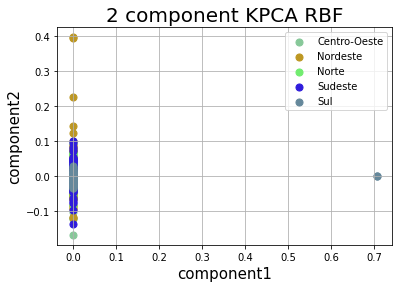

In [ ]:
fig3 = plt.figure()
axkpca_rbf = fig3.add_subplot() 
axkpca_rbf.set_xlabel('component1', fontsize = 15)
axkpca_rbf.set_ylabel('component2', fontsize = 15)
axkpca_rbf.set_title('2 component KPCA RBF', fontsize = 20)
for index, row in dfGrandeReg.iterrows():
    indicesToKeep = df_kpca_rbf_principal.index[df_kpca_rbf_principal['GRANDE_REG'] == row['GRANDE_REG']]
    axkpca_rbf.scatter(df_kpca_rbf_principal.loc[indicesToKeep, 'component1']
               , df_kpca_rbf_principal.loc[indicesToKeep, 'component2']
               , c = row['colors']
               , s = 50)
axkpca_rbf.legend(dfGrandeReg['GRANDE_REG'])
axkpca_rbf.grid()

## 4. Apresente os resultados e descreva o desempenho das técnicas


> A técnica de redução de dimensionalidade se mostrou melhor representação gráfica da amostra quando usado técnicas de redução lineares, mais especificamente o PCA. Ao voltar a análise, para técnicas não lineares, mais especificamente o KPCA, foram selecionados dois tipos de kernel para analisar o uso na amostra, o RBF e o Cosine. Ambos não se mostraram muito categóricos ao modelo.

